<a href="https://colab.research.google.com/github/harshesh/Self-Driving-Car/blob/master/MNIST_Image_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()  

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "the number of images is not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "the number of images is not equal to number of labels"
assert(X_train.shape[1:] == (28, 28)), "The dimension of images are not 28 * 28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of images are not 28 * 28"

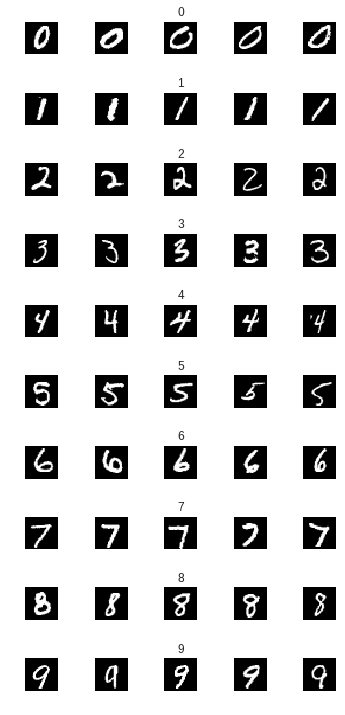

In [6]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'number of images')

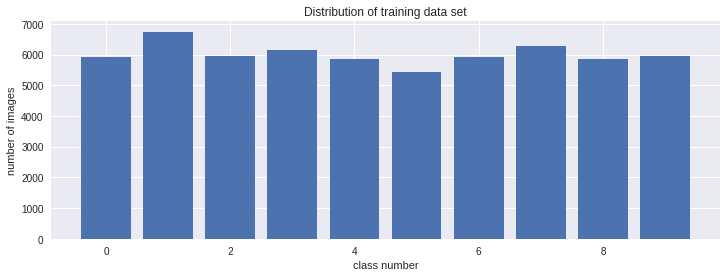

In [7]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of training data set")
plt.xlabel("class number")
plt.ylabel("number of images")

In [0]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model


In [12]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.6219 - acc: 0.8018 - val_loss: 0.3303 - val_acc: 0.8978
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3431 - acc: 0.8973 - val_loss: 0.2762 - val_acc: 0.9182
Epoch 3/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2986 - acc: 0.9104 - val_loss: 0.2432 - val_acc: 0.9300
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2807 - acc: 0.9171 - val_loss: 0.2554 - val_acc: 0.9298
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2693 - acc: 0.9198 - val_loss: 0.2168 - val_acc: 0.9358
Epoch 6/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2558 - acc: 0.9251 - val_loss: 0.2241 - val_acc: 0.9345
Epoch 7/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2532 - acc: 0.9248 - val_loss: 0.2474 - val_acc:

Text(0.5,0,'epochs')

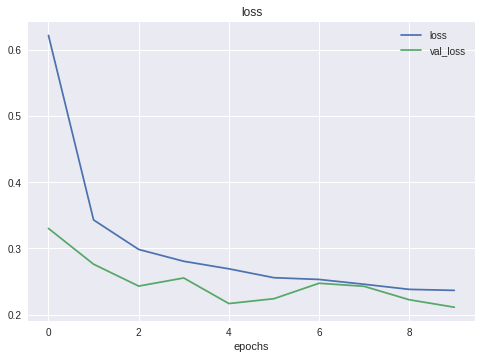

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5,0,'epochs')

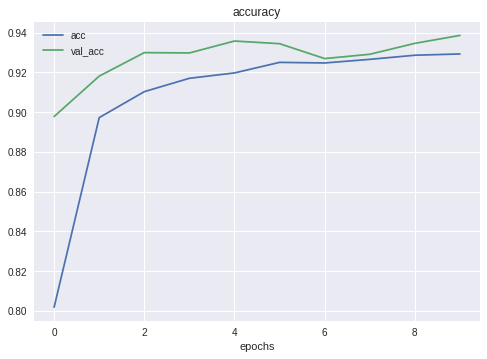

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('accuracy')
plt.xlabel('epochs')

In [16]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('test score: ', score[0])
print('test accuracy: ', score[1])

<class 'list'>
test score:  0.260674285107851
test accuracy:  0.9237


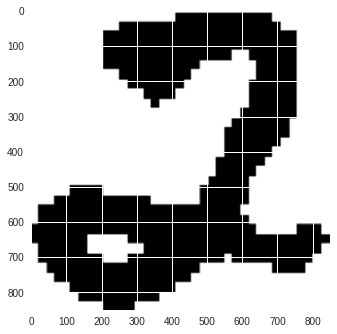

In [17]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream =True)
img = Image.open(response.raw)
plt.imshow(img)

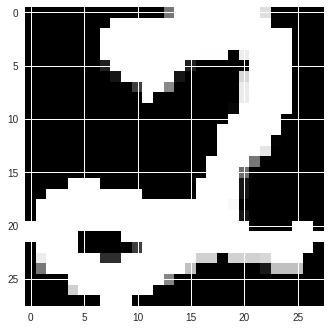

In [18]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))

gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap('gray'))

In [0]:
image = image/255
image = image.reshape(1, 784)

In [20]:
prediction = model.predict_classes(image)
print("predicted digit is ", str(prediction))

predicted digit is  [3]
